In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,SCL90_IDEA_PARAN,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,SPQ_TOTAL_ESQUIZOT
0,17,5,0,7,5,13,2,20,0,24,4,0
1,13,11,3,6,11,17,11,17,1,22,9,0
2,20,20,20,11,8,3,0,20,1,30,12,1
3,12,1,0,4,6,3,1,18,0,20,4,0
4,8,9,17,4,14,2,6,27,17,35,17,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 80% de los datos para entrenamiento y un 20% de los datos para validación
valid_idx  =  range ( len ( df ) - 57 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_AUTOCRIT', 'CSI_REESTCOGN', 'CSI_PENSDESID', 'CSI_APOYOSOC', 'CSI_RETISOC', 'ANSIEDADRASGO', 'CSI_RESPROBL', 'CSI_EVITPROBL', 'CAPE_POSIT_FREC', 'SCL90_IDEA_PARAN', 'TRAUMA_FRECUENCIA']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-0.209928 -0.777217 -1.203449  0.095265 ...  1.192199 -0.633621 -0.899054 -0.2719  ]
 [ 1.519336 -0.593351  0.956085  0.430892 ... -0.545358 -0.474171 -0.70646  -0.648693]
 [ 0.481777 -0.777217  0.457731 -0.743802 ...  0.106226 -0.633621  0.641701 -0.554494]
 [ 0.308851 -0.041751  1.288321 -1.582869 ...  0.106226  0.960875  1.219484 -0.648693]
 [-0.901634 -0.777217  0.789967  0.263079 ...  0.323421 -0.79307   0.063918  0.481686]]
[0 0 1 1 0]


In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.039509,1.017930,0.578947,03:36
1,0.894560,0.974955,0.596491,02:48
2,0.808881,0.936851,0.649123,02:54
3,0.734899,0.903982,0.649123,02:50
4,0.687467,0.889402,0.649123,03:43


CSI_AUTOCRIT,CSI_REESTCOGN,CSI_PENSDESID,CSI_APOYOSOC,CSI_RETISOC,ANSIEDADRASGO,CSI_RESPROBL,CSI_EVITPROBL,CAPE_POSIT_FREC,SCL90_IDEA_PARAN,TRAUMA_FRECUENCIA,target,prediction
0.6547,-0.2256,-0.7051,-1.0794,-0.1961,-0.1457,-0.3240,-0.3282,0.6420,1.0269,0.2933,1,1
-0.9016,-0.5934,-1.2034,-0.9116,-1.0393,-0.1457,-0.9271,-0.7626,-0.3147,-0.3213,0.1049,0,0
0.8276,0.1421,-0.3729,0.0953,0.6471,-4.0316,-0.5250,0.7578,-1.1120,-0.8991,-1.2139,1,0
0.3089,-0.7772,-0.2067,-0.2404,0.0147,-0.1457,-0.5250,-0.1110,-0.7931,-0.7065,0.0107,0,0
0.1359,-1.3288,1.2883,-0.4082,0.2255,0.6639,0.0781,-1.1969,0.4825,0.8343,-0.6487,1,1


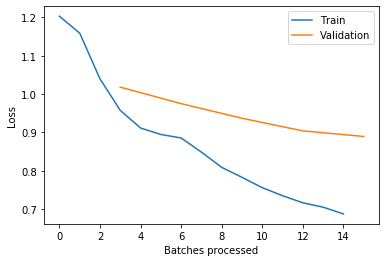

In [10]:
learn.recorder.plot_losses()
learn.show_results()